# Recommind 

I have created a content-based recommendation engine to match patients with mental health practitioners that best suit their needs. 

Below I will use cosine similarity as our distance metric and will sort the top match results by our similarity metric and then distance from the patient.

In [1]:
import functions as f
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# instantiating the class
r = f.Recommendation('vectorized', 'response', 'zipsdf', 'gender', 'new_patient', 'need_ins', 'langs', 'specs', 'ins_s', '_id', 'zipcode', 'rec_input', 'n')

df = f.vectorized

## Exploratory Data Analysis

Before we get started with our algorithm, let's take a look at our practitioners. 

### Below we can see our breakdown of gender

[[Text(0, 0, 'Male'), Text(0, 0, 'Female')]]

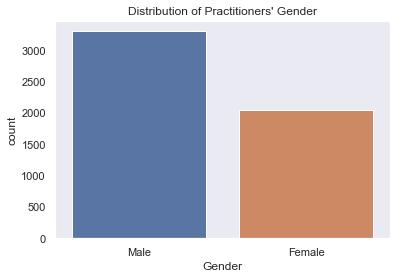

In [76]:
fig, ax = plt.subplots()
sns.set(style='dark', palette='deep')
sns.countplot(x='Gender', data=df)
ax.set_title("Distribution of Practitioners' Gender")
ax.set(xticklabels=['Male', 'Female'])

### We can see the the majority of our practitioners are accepting new patients

[[Text(0, 0, 'No'), Text(0, 0, 'Yes')]]

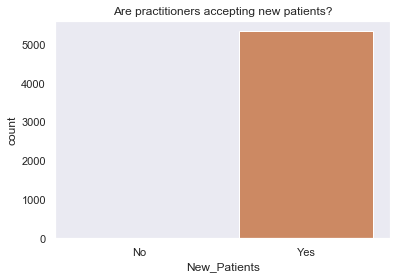

In [22]:
fig, ax = plt.subplots()
sns.set(style='dark', palette='deep')
sns.countplot(x='New_Patients', data=df)
ax.set_title("Are practitioners accepting new patients?")
ax.set(xticklabels=['No', 'Yes'])

### And that just over 25% of our practitioners do not accept insurance 

[[Text(0, 0, 'No'), Text(0, 0, 'Yes')]]

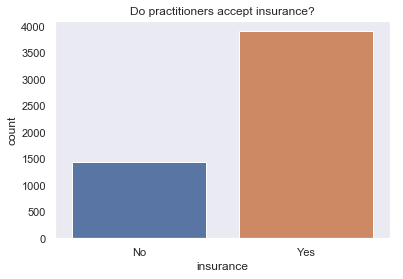

In [23]:
fig, ax = plt.subplots()
sns.set(style='dark', palette='deep')
sns.countplot(x='insurance', data=df)
ax.set_title("Do practitioners accept insurance?")
ax.set(xticklabels=['No', 'Yes'])

### Let's do a practice run for a proof of concept.
Below I have created sample variables for a "user."

In [28]:
gender = 1 
# user would like a female practitioner
new_patient = True
# user is a new patient
need_insurance = True
# user needs insurance coverage
language = ['English']
# user speaks English
spec = ['Psychiatry']
# user would like a psychiatrist
insurance = ['medicare-medicare']
# user's insurance is cigna-cignahmo

Below, we'll format our user input for our algorithm.

In [29]:
sample = r.rec_input(gender, new_patient, need_insurance, language, spec, insurance)
sample

,Gender,New_Patients,num_lang,insurance,Addiction Medicine,Addiction Psychiatry,Child & Adolescent Psychiatry,Chiropractic Neurology,Clinical Neurophysiology,Clinical Psychology,...,Gujarati,Hebrew,Hindi,Korean,Polish,Portuguese,Russian,Slovak,Spanish,Urdu
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now that we have our vectorized user data, let's run our cosine similarity! 
Let's generate the top 5 matches closest to our zip code of 11218 and see our top match.

In [31]:
recs = r.cos_sim(f.vectorized, sample, 5, '11218')
recs[0]

['Name: Hayley Cort, MD',
 'Address: 1651 3rd Ave New York, NY 10128',
 'Gender: Female',
 'Language(s): English',
 'Specialty/ies: Psychiatry',
 'Bio: Dr. Hayley Cort, MD practices medicine at New york, New York and specializes in psychiatry.  Dr. Cort is licensed to see patients in New York.  In addition to having active medical licenses, Dr. Cort has passed an automated background check which looked at elements including medical license status and malpractice screening (no history found).',
 'Insurances Accepted: medicare-medicare']